# Exercise 1

In [318]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()


## Cancer Dataset

In [319]:
import pandas as pd
import numpy as np

In [320]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [321]:
cancer.target = 1 - cancer.target

I switch the values of the target column because i want to calculate the recall on the maligns cases and before it was 0 and now it's 1, so it is easier to visualize

In [322]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [323]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1.0


In [324]:
df_cancer.shape

(569, 31)

In [325]:
df_cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [326]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

we don't have null variables, and we have 29 variables

In [327]:
df_cancer.target.value_counts()

target
0.0    357
1.0    212
Name: count, dtype: int64

The metric most important in this case is for sure the recall, because we want to minimize as much as we can the false negative results, because those can lead at much more serious problems because the cancer may not be discovered in time.

### ANALYZE THE MODELS KNN AND LOGISTIC REGRESSION

### KNN

In [328]:
from sklearn.model_selection import train_test_split

In [329]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=10)

In [330]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
pipeline = Pipeline([
    ('classifier', KNeighborsClassifier())
])

param_grid = {
    'classifier__n_neighbors': range(1, 20)
}

gridKn = GridSearchCV(pipeline, param_grid, cv=5)
gridKn.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.2f}".format(gridKn.best_score_))
print("Best set score: {:.2f}".format(gridKn.score(X_test, y_test)))
print("Best parameters: ", gridKn.best_params_)


Best cross-validation accuracy: 0.94
Best set score: 0.92
Best parameters:  {'classifier__n_neighbors': 7}


In [331]:
print("Best cross-validation accuracy: {:.2f}".format(gridKn.best_score_))
print("Best set score: {:.2f}".format(gridKn.score(X_test, y_test)))
print("Best parameters: ", gridKn.best_params_)

Best cross-validation accuracy: 0.94
Best set score: 0.92
Best parameters:  {'classifier__n_neighbors': 7}


In [332]:
from sklearn.model_selection import cross_val_score

best_score = 0

for n_neighbors in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)        
    scores = cross_val_score(knn, X_train, y_train, cv=5) # Calcula validación cruzada
    score = np.mean(scores) # Calcula media de la validación cruzada para precisión
    if score > best_score:
        best_score = score
        best_parameters = {'n_neighbors': n_neighbors}
print("Best cross-validation accuracy: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)

Best cross-validation accuracy: 0.94
Best parameters:  {'n_neighbors': 7}


In [333]:
knn = KNeighborsClassifier(**best_parameters)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [334]:
print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.92


With KNN we obtain a really good accuracy, later i'll check the recall, that is going to be the most important metric in this specific case

In [335]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score
import seaborn as sns

### LOGISTIC REGRESSION

In [336]:
from sklearn.linear_model import LogisticRegression

In [ ]:
param_gridLr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
gridLr = GridSearchCV(LogisticRegression(), param_gridLr, cv=5, return_train_score=True, scoring='accuracy')
gridLr.fit(X_train, y_train)

In [338]:
print("Best cross-validation accuracy: {:.2f}".format(gridLr.best_score_))
print("Best set score: {:.2f}".format(gridLr.score(X_test, y_test)))
print("Best parameters: ", gridLr.best_params_)

Best cross-validation accuracy: 0.94
Best set score: 0.92
Best parameters:  {'C': 1}


In [ ]:
best_scoreLr = 0

for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    Lr = LogisticRegression(C= c)      
    scores = cross_val_score(Lr, X_train, y_train, cv=5) # Calcula validación cruzada
    score = np.mean(scores) # Calcula media de la validación cruzada para precisión
    if score > best_scoreLr:
        best_scoreLr = score
        best_parametersLr = {'C': c}


In [340]:
print("Best logistic regression accuracy: {:.2f}".format(best_scoreLr))
print("Best parameters: ", best_parametersLr)

Best logistic regression accuracy: 0.94
Best parameters:  {'C': 1}


In [ ]:
Lr = LogisticRegression(**best_parametersLr)
Lr.fit(X_train, y_train)

In [342]:
print("Test set accuracy: {:.2f}".format(Lr.score(X_test, y_test)))

Test set accuracy: 0.92


### Verification
Let' verify if the the gridsearchCv results match the manual ones

In [343]:
import pandas as pd

# Create a dictionary with the results
results = {
    'Model': ['KNN', 'Logistic Regression'],
    'Best Cross-Validation Accuracy (GridSearchCV)': [gridKn.best_score_, gridLr.best_score_],
    'Best Cross-Validation Accuracy (Manual)': [best_score, best_scoreLr],
    'Best Set Score (GridSearchCV)': [gridKn.score(X_test, y_test), gridLr.score(X_test, y_test)],  
    'Test Set Accuracy (Manual)': [knn.score(X_test, y_test), Lr.score(X_test, y_test)],  
    'Best Parameters (Manual)': [best_parameters, best_parametersLr]
    
}

# Create a DataFrame from the dictionary
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results


,Model,Best Cross-Validation Accuracy (GridSearchCV),Best Cross-Validation Accuracy (Manual),Best Set Score (GridSearchCV),Test Set Accuracy (Manual),Best Parameters (Manual)
0,KNN,0.938960,0.938960,0.923077,0.923077,{'n_neighbors': 7}
1,Logistic Regression,0.943666,0.943666,0.916084,0.916084,{'C': 1}


The results match perfectly

Now i analize the recall of the two models to determine which one fits best this problem


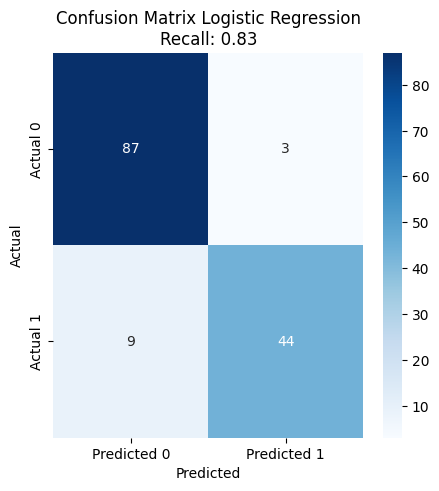

In [344]:
y_pred = gridLr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix Logistic Regression\nRecall: {recall:.2f}")
plt.show()

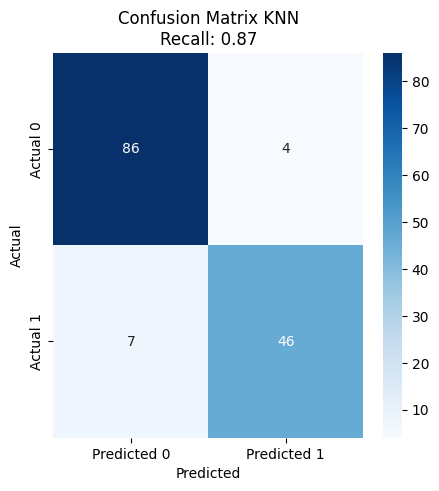

In [345]:
y_pred = gridKn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix KNN\nRecall: {recall:.2f}")
plt.show()

We can see that using KNN we get a better result, achieving a really good 87%, but still in this case we would have gotten 7 people in danger, by predicting them to be healthy instead of in danger, we could try to get a better result using a scaler

In [357]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', KNeighborsClassifier())
])

param_grid = {
    'classifier__n_neighbors': range(1, 20)
}

gridKn = GridSearchCV(pipeline, param_grid, cv=5,scoring='recall')
gridKn.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.2f}".format(gridKn.best_score_))
print("Best set score: {:.2f}".format(gridKn.score(X_test, y_test)))
print("Best parameters: ", gridKn.best_params_)


Best cross-validation accuracy: 0.92
Best set score: 0.98
Best parameters:  {'classifier__n_neighbors': 5}


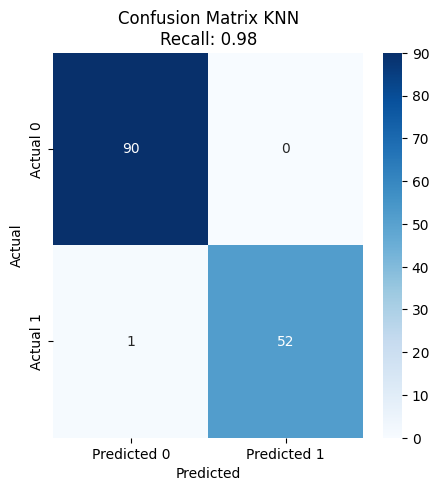

In [358]:
y_pred = gridKn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix KNN\nRecall: {recall:.2f}")
plt.show()

Ho we can see we obtained a 98% of recall, by getting only 1 error and only got 1 person in danger, so i would say that this is the best model for this specific case

### TABLE RESULTS

In [ ]:
from sklearn.metrics import classification_report, f1_score, precision_score, roc_auc_score

# Calculate the classification report for KNN
knn_report = classification_report(y_test, gridKn.predict(X_test), target_names=['Malignant', 'Benign'])

# Calculate the classification report for Logistic Regression
lr_report = classification_report(y_test, gridLr.predict(X_test), target_names=['Malignant', 'Benign'])

# Create a DataFrame to store the results
df_report = pd.DataFrame({'Model': ['KNN', 'Logistic Regression'],
                          'Accuracy': [gridKn.score(X_test, y_test), gridLr.score(X_test, y_test)],
                          'Recall': [recall_score(y_test, gridKn.predict(X_test)), recall_score(y_test, gridLr.predict(X_test))],
                          'Precision': [precision_score(y_test, gridKn.predict(X_test)), precision_score(y_test, gridLr.predict(X_test))],
                          'F1 Score': [f1_score(y_test, gridKn.predict(X_test)), f1_score(y_test, gridLr.predict(X_test))],
                          'AUC': [roc_auc_score(y_test, gridKn.predict_proba(X_test)[:, 1]), roc_auc_score(y_test, gridLr.predict_proba(X_test)[:, 1])]
                         })

# Display the DataFrame
df_report


,Model,Accuracy,Recall,Precision,F1 Score,AUC
0,KNN,0.923077,0.867925,0.92000,0.893204,0.952201
1,Logistic Regression,0.916084,0.830189,0.93617,0.880000,0.976730


## Boston Housing

### Preprocessing

In [ ]:
import mglearn
X, y = mglearn.datasets.load_extended_boston()

In [ ]:
df_X = pd.DataFrame(X)
df_Y = pd.DataFrame(y)

In [ ]:
df_X.head()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,...,0.043270,0.059749,0.208015,0.018655,0.082503,0.287234,0.025759,1.000000,0.089680,0.008042
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.011017,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.000000,0.204470,0.041808
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.011017,0.058064,0.103885,0.006661,0.306021,0.547514,0.035109,0.979580,0.062814,0.004028
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066794,0.006635,0.421118,0.648936,0.064464,1.000000,0.099338,0.009868


In [ ]:
df_Y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

Lreg = LinearRegression()


In [ ]:
Lreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
Lreg.score(X_train, y_train)

0.9520519609032729

In [ ]:
Lreg.score(X_test, y_test)

0.6074721959666257

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred_train = Lreg.predict(X_train)
y_pred_test = Lreg.predict(X_test)

r2_train_reg = r2_score(y_train, y_pred_train)
r2_test_reg = r2_score(y_test, y_pred_test)

rmse_train_reg = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test_reg = mean_squared_error(y_test, y_pred_test, squared=False)

print("R2 score - Train: {:.2f}".format(r2_train_reg))
print("R2 score - Test: {:.2f}".format(r2_test_reg))
print("RMSE score - Train: {:.2f}".format(rmse_train_reg))
print("RMSE score - Test: {:.2f}".format(rmse_test_reg))

R2 score - Train: 0.95
R2 score - Test: 0.61
RMSE score - Train: 2.02
RMSE score - Test: 5.66


/Users/leonardovaia/miniconda3/envs/ml_venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/leonardovaia/miniconda3/envs/ml_venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.metrics import r2_score, mean_squared_error


pipeline = Pipeline([
    ('regressor', Ridge())
])

param_grid = {
    'regressor__alpha': [0.0001, 0.01, 0.1, 1.0, 10.0, 100 ,1000]
}

ridge = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1)
ridge.fit(X_train, y_train)




GridSearchCV(cv=5, estimator=Pipeline(steps=[('regressor', Ridge())]),
             n_jobs=-1,
             param_grid={'regressor__alpha': [0.0001, 0.01, 0.1, 1.0, 10.0, 100,
                                              1000]})

In [ ]:
print("Best parameters: ", ridge.best_params_)

Best parameters:  {'regressor__alpha': 0.1}


In [ ]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train_rg = r2_score(y_train, y_pred_train)
r2_test_rg = r2_score(y_test, y_pred_test)

rmse_train_rg = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test_rg = mean_squared_error(y_test, y_pred_test, squared=False)

print("R2 score - Train: {:.2f}".format(r2_train_rg))
print("R2 score - Test: {:.2f}".format(r2_test_rg))
print("RMSE score - Train: {:.2f}".format(rmse_train_rg))
print("RMSE score - Test: {:.2f}".format(rmse_test_rg))

R2 score - Train: 0.93
R2 score - Test: 0.77
RMSE score - Train: 2.47
RMSE score - Test: 4.31


/Users/leonardovaia/miniconda3/envs/ml_venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/leonardovaia/miniconda3/envs/ml_venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Ridge - Manual

In [ ]:
best_scoreRg = 0

for alpha in [0.0001, 0.01, 0.1, 1.0, 10.0, 100 ,1000]:
    Rg = Ridge(alpha= alpha)    
    scores = cross_val_score(Rg, X_train, y_train, cv=5) # Calcula validación cruzada
    score = np.mean(scores) # Calcula media de la validación cruzada para precisión
    if score > best_scoreRg:
        best_scoreRg = score
        best_parametersRg = {'alpha': alpha}

In [ ]:
Rg = Ridge(**best_parametersRg)
Rg.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
y_pred_train = Rg.predict(X_train)
y_pred_test = Rg.predict(X_test)

r2_train_rg = r2_score(y_train, y_pred_train)
r2_test_rg = r2_score(y_test, y_pred_test)

rmse_train_rg = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test_rg = mean_squared_error(y_test, y_pred_test, squared=False)

print("R2 score - Train: {:.2f}".format(r2_train_rg))
print("R2 score - Test: {:.2f}".format(r2_test_rg))
print("RMSE score - Train: {:.2f}".format(rmse_train_rg))
print("RMSE score - Test: {:.2f}".format(rmse_test_rg))


R2 score - Train: 0.93
R2 score - Test: 0.77
RMSE score - Train: 2.47
RMSE score - Test: 4.31


/Users/leonardovaia/miniconda3/envs/ml_venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/leonardovaia/miniconda3/envs/ml_venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Lasso

In [ ]:

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.linear_model import Lasso


pipeline = Pipeline([
    ('regressor', Lasso())
])

param_grid = {
    'regressor__alpha': [0.0001, 0.01, 0.1, 1.0, 10.0, 100 ,1000]
}

lasso = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1)
lasso.fit(X_train, y_train)

In [ ]:

print("Best parameters: ", lasso.best_params_)

Best parameters:  {'regressor__alpha': 0.01}


In [ ]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_ls = r2_score(y_train, y_pred_train)
r2_test_ls = r2_score(y_test, y_pred_test)

rmse_train_ls = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test_ls = mean_squared_error(y_test, y_pred_test, squared=False)

print("R2 score - Train: {:.2f}".format(r2_train_ls))
print("R2 score - Test: {:.2f}".format(r2_test_ls))
print("RMSE score - Train: {:.2f}".format(rmse_train_ls))
print("RMSE score - Test: {:.2f}".format(rmse_test_ls))

R2 score - Train: 0.90
R2 score - Test: 0.77
RMSE score - Train: 2.98
RMSE score - Test: 4.36


/Users/leonardovaia/miniconda3/envs/ml_venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/leonardovaia/miniconda3/envs/ml_venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Lasso Manual

In [ ]:
best_scoreLs = 0

for alpha in [0.0001, 0.01, 0.1, 1.0, 10.0, 100 ,1000]:
    Ls = Lasso(alpha= alpha)    
    scores = cross_val_score(Ls, X_train, y_train, cv=5) # Calcula validación cruzada
    score = np.mean(scores) # Calcula media de la validación cruzada para precisión
    if score > best_scoreLs:
        best_scoreLs = score
        best_parametersLs = {'alpha': alpha}

In [ ]:
print("Best parameters: ", best_parametersLs)

Best parameters:  {'alpha': 0.01}


In [ ]:
Ls = Lasso(**best_parametersLs)
Ls.fit(X_train, y_train)

In [ ]:
y_pred_train = Ls.predict(X_train)
y_pred_test = Ls.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("R2 score - Train: {:.2f}".format(r2_train))
print("R2 score - Test: {:.2f}".format(r2_test))
print("RMSE score - Train: {:.2f}".format(rmse_train))
print("RMSE score - Test: {:.2f}".format(rmse_test))

R2 score - Train: 0.90
R2 score - Test: 0.77
RMSE score - Train: 2.98
RMSE score - Test: 4.36


/Users/leonardovaia/miniconda3/envs/ml_venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/leonardovaia/miniconda3/envs/ml_venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Final evaluation

In [ ]:
import pandas as pd

# Create a dictionary with the results
results = {
    'Model': ['Ridge', 'Lasso', 'Linear Regression'],
    'R2 Score - Train': [r2_train_rg, r2_train_ls, r2_train_reg],
    'R2 Score - Test': [r2_test_rg, r2_test_ls, r2_test_reg],
    'RMSE Score - Train': [rmse_train_rg, rmse_train_ls, rmse_train_reg],
    'RMSE Score - Test': [rmse_test_rg, rmse_test_ls, rmse_test_reg]
}

# Create a DataFrame from the dictionary
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results


,Model,R2 Score - Train,R2 Score - Test,RMSE Score - Train,RMSE Score - Test
0,Ridge,0.928227,0.772207,2.474429,4.313987
1,Lasso,0.896112,0.767800,2.976992,4.355519
2,Linear Regression,0.952052,0.607472,2.022464,5.662962


#### We can see that the Lasso and Ridge are really similar in the results, but the ridge obtained a better R2 score and a slightly worse RMSE score, so the model ridge could be the best option for this problem, but also Lasso is a valid option, based on what metric we prefer